In [2]:
from springyknn.springyknn import *

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA

mnist = fetch_mldata("MNIST original")
pca = PCA(n_components=100)
MX = pca.fit_transform(mnist.data / 255.0)
#MX = mnist.data / 255.0
My = mnist.target
print('Explained total variation: ,', format(sum(pca.explained_variance_ratio_)))
print(MX.shape)

Explained total variation: , 0.9146780121791667
(70000, 100)


In [6]:
springyknn = SpringyKNN(MX, My, randomize=True, num_pivots=5000)
G = springyknn.get_springy_knn_graph(k1=10, k2=20)
springyknn.write_gexf(G, filename='mnist_springyknn_graph.gexf')

Started kNN of data on pivots...


  0%|          | 77/70000 [00:00<01:30, 768.39it/s]

Finished kNN of data on pivots in  88.85947179794312  secs
Started spring strength computation between pivots...


100%|██████████| 70000/70000 [00:42<00:00, 1648.62it/s]


Finished spring strength computation in  42.46289420127869  secs
Started kNN graph computation from lil_matrix...


100%|██████████| 5000/5000 [00:01<00:00, 4627.24it/s]


Finished kNN graph of pivots in  4.831652879714966  secs
Preparing networkx graph...
Finished preparing networkx graph in  0.7044291496276855  secs
Saved gexf file


Preparing networkx visualization...
Computing circular layout positions...
Finished computing circular layout positions in  0.0038118362426757812  secs
Computing spring layout positions...
Finished computing spring layout positions in  492.9621968269348  secs


<IPython.core.display.Javascript object>


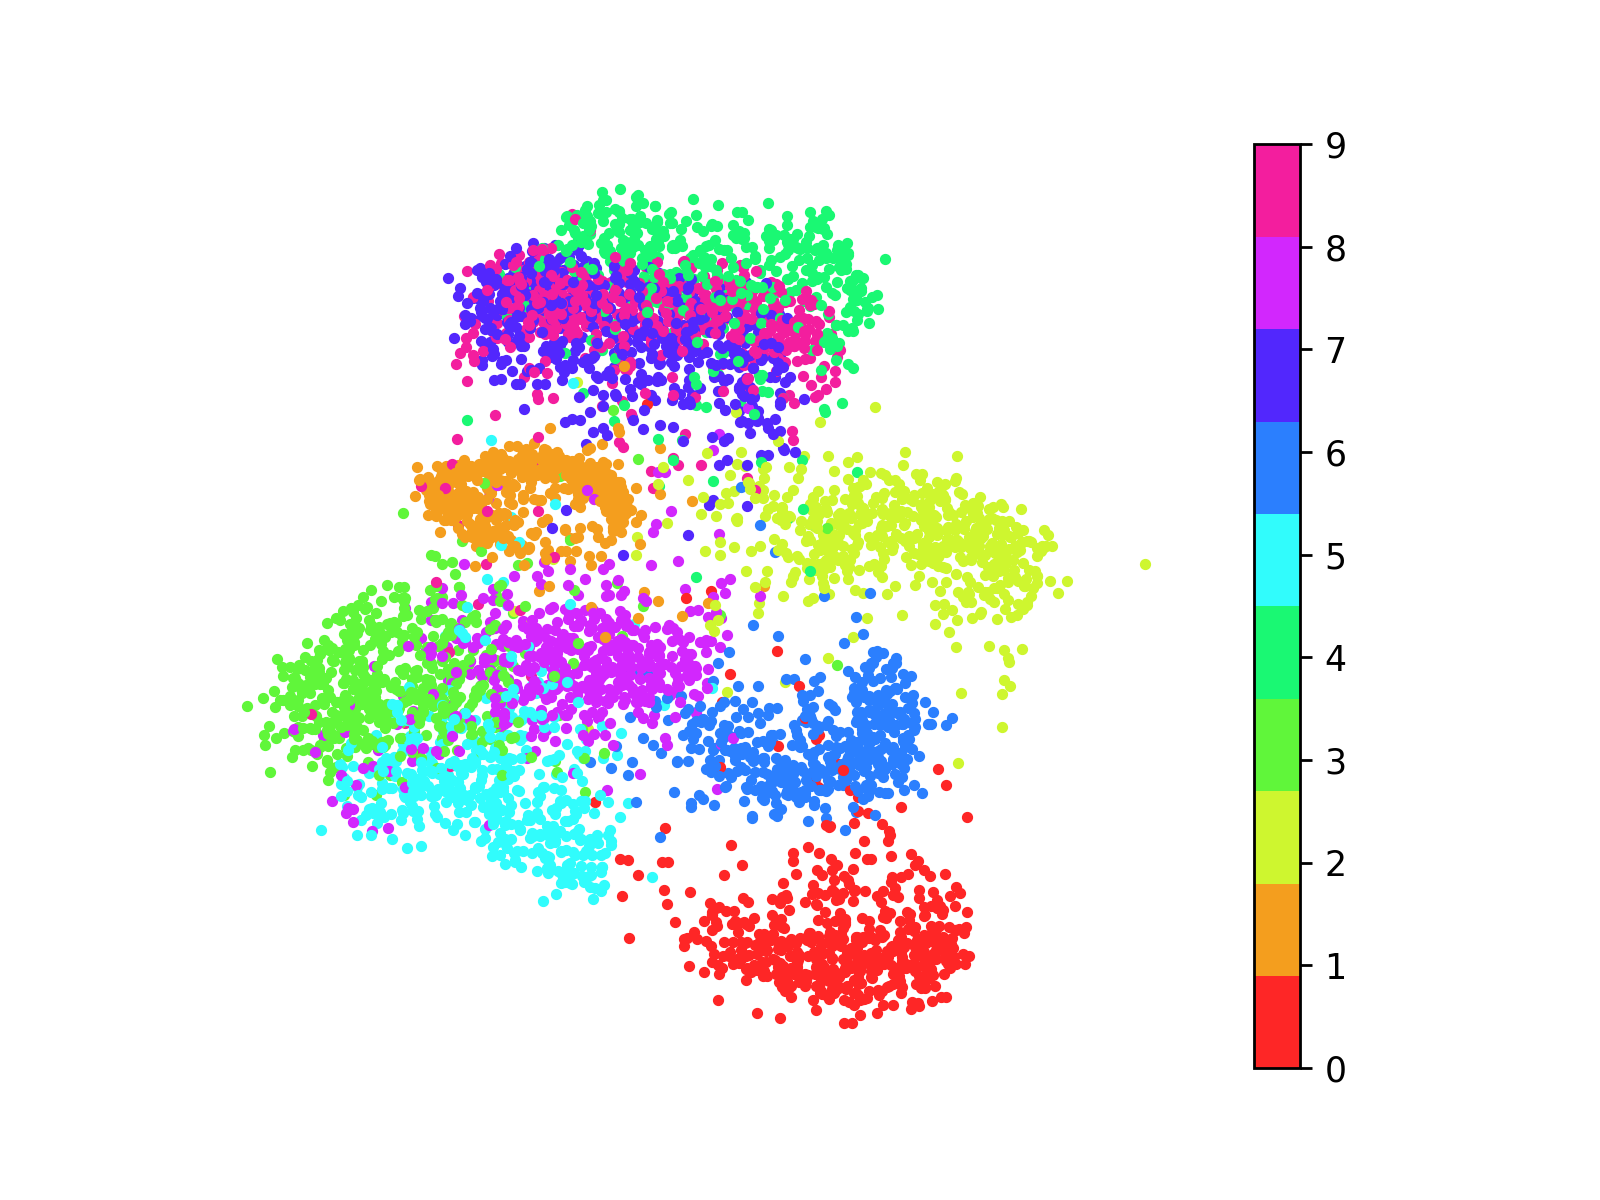

Finished networkx visualization in  542.5175039768219  secs


In [5]:
springyknn.viz_spring_graph(G, dim=2, iterations=150, scale=1.0)